## Testing the bootstrap and plotting results

### Use sample size of 1000

In [1]:
import seaborn as sns
import matplotlib.pylab as plt
import pylab as p
import numpy as np

In [2]:
from src.population_distributions import get_population_gauss
from src.simulation import get_population_and_metrics, get_sample
from src.bootstrap import bootstrap
from src.confidence_intervals import confidence_interval, analytic_confidence_interval

In [10]:
normal_dist = get_population_gauss(mu=0, sigma=1)
pop, avg_std = get_population_and_metrics(normal_dist, pop_size=100000, 
                                          metric_functions={"mean": np.mean, "std": np.std})
sample = get_sample(pop, sample_size=1000)
print("Shape of the sample:     ", sample.shape)
sample_mean = np.mean(sample)
print("Mean value of the sample:", sample_mean)

Shape of the sample:      (1, 1000)
Mean value of the sample: 0.020003596960204695


In [4]:
res = bootstrap(sample, num_iter=1000, resample_size=1000, metrics={"mean": np.mean, "std": np.std})
res_mean = [single_res['mean'] for single_res in res]
res_std = [single_res['std'] for single_res in res]

conf_mean = confidence_interval(res_mean, 0.9)
conf_std = confidence_interval(res_std, 0.9)

conf_mean_ana = analytic_confidence_interval(sample.shape[1], sample_mean, crtc_val=1.645)

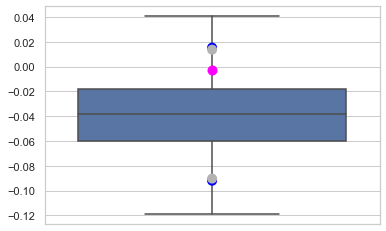

In [5]:

sns.set(style="whitegrid")

ax = sns.boxplot(y=res_mean, showfliers = False)
ax = sns.swarmplot(y=[avg_std['mean']], size=10, color="magenta")
ax = sns.swarmplot(y=[conf_mean.lower_bound, conf_mean.upper_bound], size=10, color="blue")
ax = sns.swarmplot(y=[conf_mean_ana.lower_bound, conf_mean_ana.upper_bound], size=10, color="0.7")


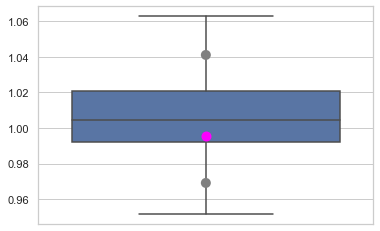

In [6]:
sns.set(style="whitegrid")

conf_int = confidence_interval(res_std)

ax = sns.boxplot(y=res_std, showfliers = False)
ax = sns.swarmplot(y=[avg_std['std']], size=10, color="magenta")
ax = sns.swarmplot(y=[conf_std.lower_bound, conf_std.upper_bound], size=10, color="0.5")

### Visualizing a single sample bootstrap and comparing confidence intervals

In [7]:
res = bootstrap(sample, num_iter=1000, resample_size=1000, metrics={"mean": np.mean, "std": np.std})
res_mean = [single_res['mean'] for single_res in res]

sample_mean = np.mean(sample)

conf = confidence_interval(res_mean, 0.9)
conf_ana = analytic_confidence_interval(sample.shape[1], sample_mean, crtc_val=1.645)

print("Sample Mean:", sample_mean)
print("\n")
print("Percentile Confidence Interval:\n  ", conf)
print("Analytical Confidence Interval:\n  ", conf_ana)
print("\n")
print("Sample mean in analytical confidence interval:")
print("   ", True if conf_ana.lower_bound <= sample_mean <= conf_ana.upper_bound else False)
print("sample mean in percentile confidence interval:")
print("   ", True if conf.lower_bound <= sample_mean <= conf.upper_bound else False)

Sample Mean: -0.03831341160457056


Percentile Confidence Interval:
   ConfidenceInterval(lower_bound=-0.09064678699761518, upper_bound=0.014018629799676455)
Analytical Confidence Interval:
   ConfidenceInterval(lower_bound=-0.0903328791143404, upper_bound=0.013706055905199285)


Sample mean in analytical confidence interval:
    True
sample mean in percentile confidence interval:
    True


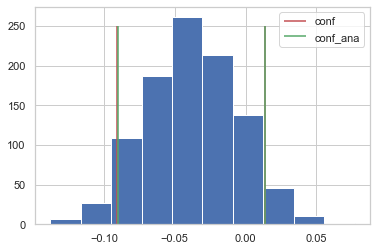

In [8]:
plt.hist(res_mean, bins=10)
plt.vlines([conf.lower_bound, conf.upper_bound], 0, 250, colors=['r', 'r'], label='conf')
plt.vlines([conf_ana.lower_bound, conf_ana.upper_bound], 0, 250, colors=['g', 'g'], label='conf_ana')
plt.legend()